In [10]:
import numpy as np
import matplotlib.pyplot as plt

Parametry zadania

In [11]:
N_MAX = 10_000        # liczba losowań
STANY = [0, 1, 2]     # możliwe stany

1. Macierz przejść P

In [12]:
P = np.array([
    [0.64, 0.32, 0.04],
    [0.40, 0.50, 0.10],
    [0.25, 0.50, 0.25]
])

print("Macierz przejść P:")
print(P)

Macierz przejść P:
[[0.64 0.32 0.04]
 [0.4  0.5  0.1 ]
 [0.25 0.5  0.25]]


2. Rozkład stacjonarny (teoretyczny) Pi

Pi * P = Pi

In [13]:
# wyznaczamy wektor własny do wartości własnej 1
w, v = np.linalg.eig(P.T)
idx = np.argmin(np.abs(w - 1))   # wybieramy wartość własną bliską 1
Pi = np.real(v[:, idx])
Pi = Pi / Pi.sum()               # normalizacja do sumy 1

print("\nRozkład stacjonarny (teoretyczny) Pi:")
for i, val in enumerate(Pi):
    print(f"pi_{i} = {val:.6f}")


Rozkład stacjonarny (teoretyczny) Pi:
pi_0 = 0.510204
pi_1 = 0.408163
pi_2 = 0.081633


3. Funkcja do symulacji łańcucha

In [14]:
def simulate_chain(P, start_state, N_max):
    n_states = P.shape[0]
    state = start_state
    counts = np.zeros(n_states, dtype=int)
    history = np.zeros((N_max, n_states))

    for n in range(N_max):
        # losujemy kolejny stan zgodnie z odpowiednim wierszem macierzy P
        state = np.random.choice(n_states, p=P[state])
        counts[state] += 1

        # bieżący estymator Pi^EXP(N) = counts / (n+1)
        history[n, :] = counts / (n + 1)

    Pi_exp = counts / N_max
    return Pi_exp, history

np.random.seed(123)

4. Symulacja dla różnych stanów startowych

In [15]:
results = {}

for start in STANY:
    Pi_exp, hist = simulate_chain(P, start, N_MAX)
    results[start] = {"Pi_exp": Pi_exp, "history": hist}

    print(f"\nStart w stanie {start}:")
    print("Eksperymentalny rozkład stacjonarny Pi_EXP:")
    for i, val in enumerate(Pi_exp):
        print(f"Pi_EXP_{i} = {val:.6f}")
    print("Różnica Pi_EXP - Pi (teoria):")
    print(Pi_exp - Pi)


Start w stanie 0:
Eksperymentalny rozkład stacjonarny Pi_EXP:
Pi_EXP_0 = 0.510000
Pi_EXP_1 = 0.413000
Pi_EXP_2 = 0.077000
Różnica Pi_EXP - Pi (teoria):
[-0.00020408  0.00483673 -0.00463265]

Start w stanie 1:
Eksperymentalny rozkład stacjonarny Pi_EXP:
Pi_EXP_0 = 0.505800
Pi_EXP_1 = 0.411600
Pi_EXP_2 = 0.082600
Różnica Pi_EXP - Pi (teoria):
[-0.00440408  0.00343673  0.00096735]

Start w stanie 2:
Eksperymentalny rozkład stacjonarny Pi_EXP:
Pi_EXP_0 = 0.510100
Pi_EXP_1 = 0.415400
Pi_EXP_2 = 0.074500
Różnica Pi_EXP - Pi (teoria):
[-0.00010408  0.00723673 -0.00713265]


5. Wykresy zbieżności dla każdego startu

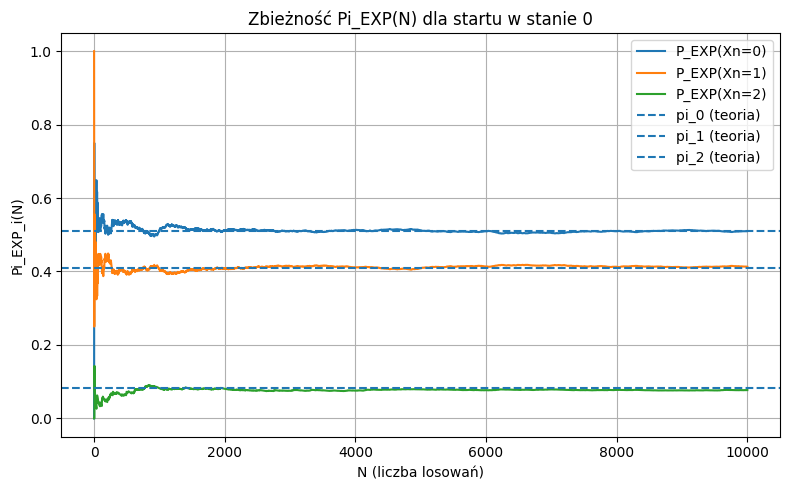

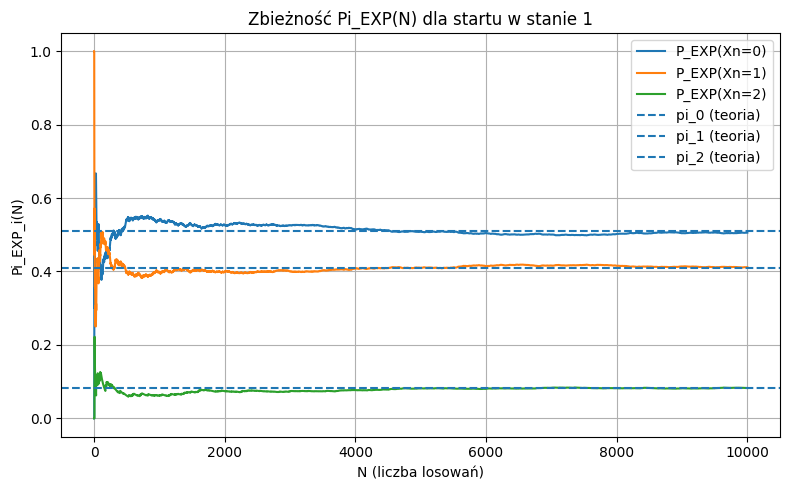

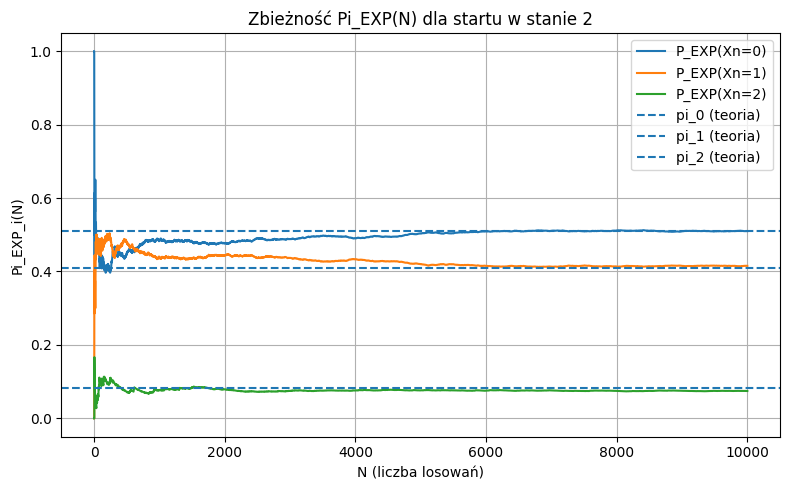

In [16]:
steps = np.arange(1, N_MAX + 1)

for start in STANY:
    hist = results[start]["history"]

    plt.figure(figsize=(8, 5))
    plt.plot(steps, hist[:, 0], label="P_EXP(Xn=0)")
    plt.plot(steps, hist[:, 1], label="P_EXP(Xn=1)")
    plt.plot(steps, hist[:, 2], label="P_EXP(Xn=2)")

    # poziome linie z teoretycznymi pi_i
    plt.axhline(Pi[0], linestyle='--', label="pi_0 (teoria)")
    plt.axhline(Pi[1], linestyle='--', label="pi_1 (teoria)")
    plt.axhline(Pi[2], linestyle='--', label="pi_2 (teoria)")

    plt.title(f"Zbieżność Pi_EXP(N) dla startu w stanie {start}")
    plt.xlabel("N (liczba losowań)")
    plt.ylabel("Pi_EXP_i(N)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
